In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/mandujoayo/인공지능개론/과제/230518/abalone.data", index_col = None, header = None)

In [3]:
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.isnull()

,0,1,2,3,4,5,6,7,8
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

<AxesSubplot:xlabel='8', ylabel='count'>

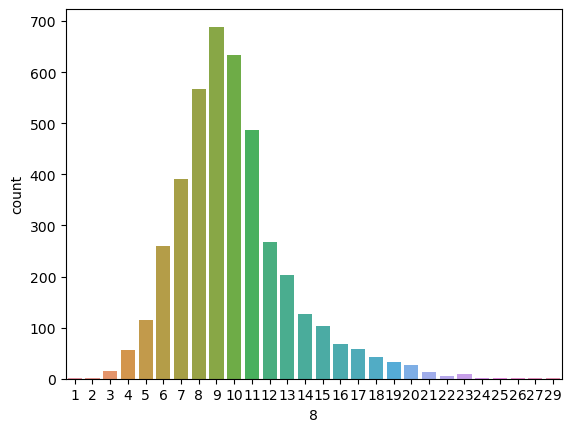

In [9]:
sns.countplot(data = data, x=data[8])

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [11]:
data

,0,1,2,3,4,5,6,7,8
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [29]:
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [30]:
X

array([[   2,   66,   56, ...,  715,  417,  199],
       [   2,   45,   36, ...,  285,  178,   94],
       [   0,   81,   67, ...,  962,  480,  280],
       ...,
       [   2,   95,   78, ..., 1727,  994,  571],
       [   0,  100,   80, ..., 1610, 1005,  518],
       [   2,  117,   94, ..., 2348, 1461,  732]], dtype=int64)

In [31]:
y

array([263, 113, 374, ..., 550, 530, 813], dtype=int64)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'elu', input_shape = (7,)))
model.add(Dense(50, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               800       
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 30)                1530      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,411
Trainable params: 7,411
Non-trainable params: 0
_________________________________________________________________


In [33]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 0s 2ms/step - loss: 1231.7584 - mse: 1231.7584 - val_loss: 2220.6548 - val_mse: 2220.6548
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 571.5468 - mse: 571.5468 - val_loss: 1284.2732 - val_mse: 1284.2732
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 346.3109 - mse: 346.3109 - val_loss: 14.0093 - val_mse: 14.0093
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 126.2255 - mse: 126.2255 - val_loss: 69.7892 - val_mse: 69.7892
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 86.0626 - mse: 86.0626 - val_loss: 61.4240 - val_mse: 61.4240
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 35.5042 - mse: 35.5042 - val_loss: 73.9191 - val_mse: 73.9191
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 15.9877 - mse: 15.9877 - val_loss: 0.4161 - val_mse: 0.4161
Epoch 8/100
105/105 [====

Epoch 62/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 63/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 64/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 65/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 66/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 67/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 68/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 69/100
105/105 [==============================] - 0s 1ms

In [34]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 728us/step - loss: 0.0012 - mse: 0.0012


[0.0012393428478389978, 0.0012393428478389978]

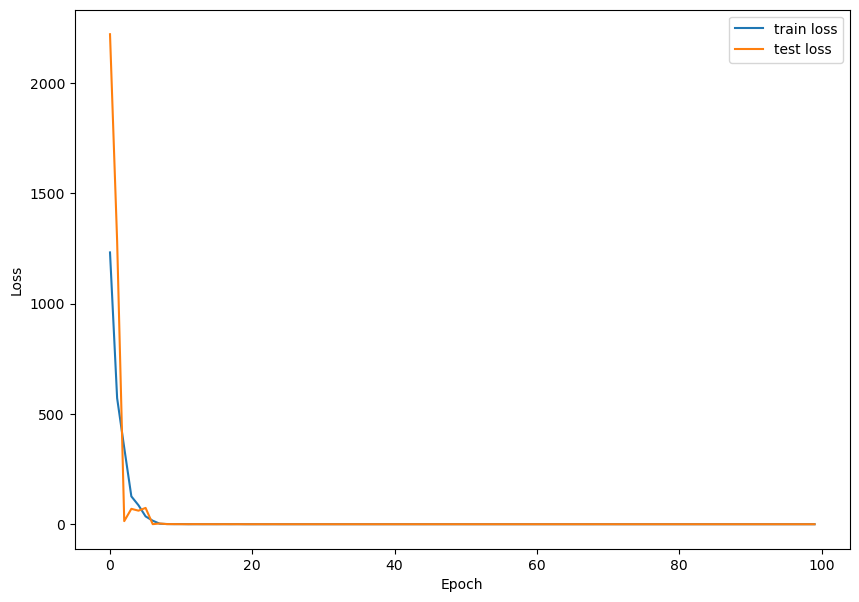

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

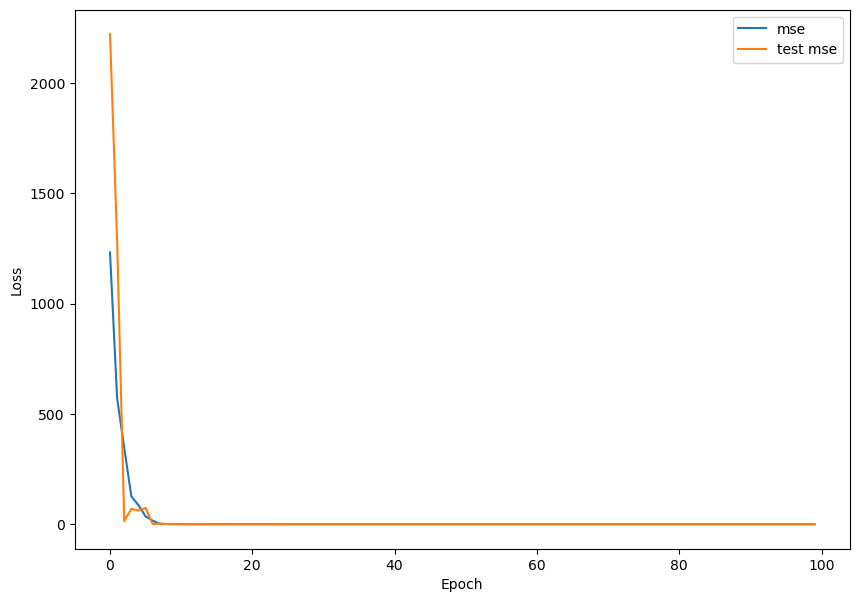

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()